import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot as pl

#from fbprophet import Prophet
#from fbprophet.diagnostics import performance_metrics
#from fbprophet.diagnostics import cross_validation

from sklearn.metrics import mean_squared_error
from numpy import sqrt

df=pd.read_csv("shoesales.csv")
df

In [3]:
df.head(10)

,YearMonth,Shoe_Sales
0,1980-01,85
1,1980-02,89
2,1980-03,109
3,1980-04,95
4,1980-05,91
5,1980-06,95
6,1980-07,96
7,1980-08,128
8,1980-09,124
9,1980-10,111


In [4]:
df.tail(10)

,YearMonth,Shoe_Sales
177,1994-10,254
178,1994-11,275
179,1994-12,394
180,1995-01,159
181,1995-02,230
182,1995-03,188
183,1995-04,195
184,1995-05,189
185,1995-06,220
186,1995-07,274


In [5]:
df.info

<bound method DataFrame.info of     YearMonth  Shoe_Sales
0     1980-01          85
1     1980-02          89
2     1980-03         109
3     1980-04          95
4     1980-05          91
..        ...         ...
182   1995-03         188
183   1995-04         195
184   1995-05         189
185   1995-06         220
186   1995-07         274

[187 rows x 2 columns]>

In [6]:
df.describe

<bound method NDFrame.describe of     YearMonth  Shoe_Sales
0     1980-01          85
1     1980-02          89
2     1980-03         109
3     1980-04          95
4     1980-05          91
..        ...         ...
182   1995-03         188
183   1995-04         195
184   1995-05         189
185   1995-06         220
186   1995-07         274

[187 rows x 2 columns]>

In [7]:
df.info

<bound method DataFrame.info of     YearMonth  Shoe_Sales
0     1980-01          85
1     1980-02          89
2     1980-03         109
3     1980-04          95
4     1980-05          91
..        ...         ...
182   1995-03         188
183   1995-04         195
184   1995-05         189
185   1995-06         220
186   1995-07         274

[187 rows x 2 columns]>

In [8]:
df.isnull().sum().sum() 

0

# There are No NULL Values

In [9]:
print(df)

    YearMonth  Shoe_Sales
0     1980-01          85
1     1980-02          89
2     1980-03         109
3     1980-04          95
4     1980-05          91
..        ...         ...
182   1995-03         188
183   1995-04         195
184   1995-05         189
185   1995-06         220
186   1995-07         274

[187 rows x 2 columns]


In [10]:
df=pd.read_csv("shoesales.csv")
df

,YearMonth,Shoe_Sales
0,1980-01,85
1,1980-02,89
2,1980-03,109
3,1980-04,95
4,1980-05,91
...,...,...
182,1995-03,188
183,1995-04,195
184,1995-05,189
185,1995-06,220


In [11]:
df=pd.read_csv("shoesales.csv")
df1 = df.copy()

In [12]:
df1[['Year', 'Month']] = df1['YearMonth'].str.split('-', expand=True)
df1

,YearMonth,Shoe_Sales,Year,Month
0,1980-01,85,1980,01
1,1980-02,89,1980,02
2,1980-03,109,1980,03
3,1980-04,95,1980,04
4,1980-05,91,1980,05
...,...,...,...,...
182,1995-03,188,1995,03
183,1995-04,195,1995,04
184,1995-05,189,1995,05
185,1995-06,220,1995,06


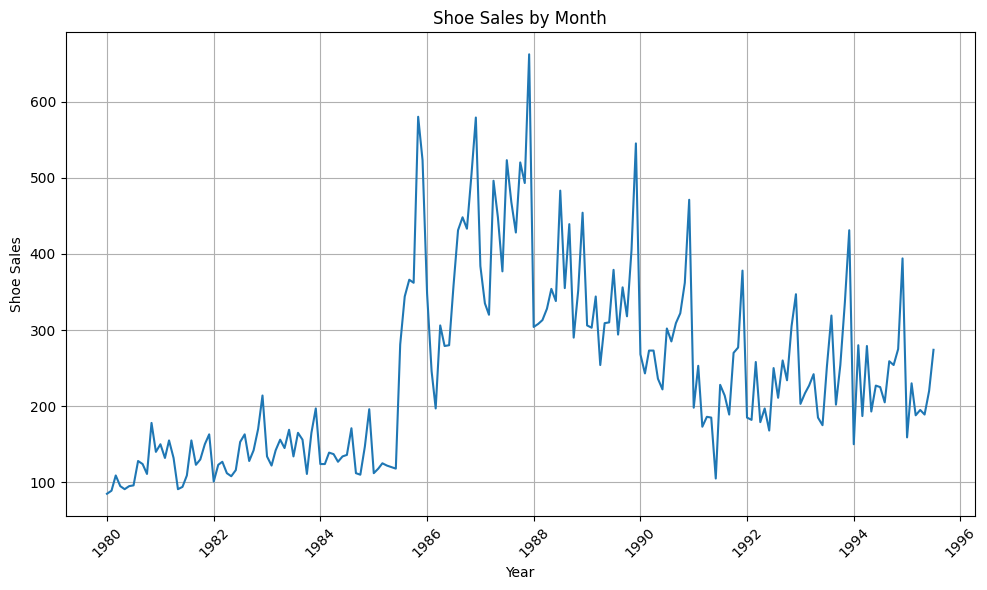

In [34]:

df1['YearMonth'] = pd.to_datetime(df1['YearMonth'])

# Create a time series plot for shoe sales by month
plt.figure(figsize=(10, 6))
plt.plot(df1['YearMonth'], df['Shoe_Sales'])#, marker='o')
plt.title('Shoe Sales by Month')
plt.xlabel('Year')
plt.ylabel('Shoe Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()




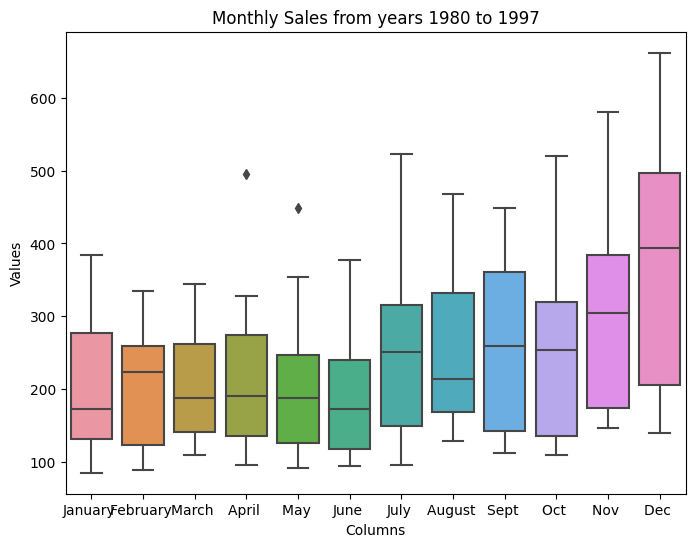

In [218]:
df1['Month'] = pd.to_numeric(df1['Month'], errors='coerce')
#january 
january= df1[df1['Month'] == 1]
february= df1[df1['Month'] == 2]
march= df1[df1['Month'] == 3]
april= df1[df1['Month'] == 4]
may= df1[df1['Month'] == 5]
june= df1[df1['Month'] == 6]
july= df1[df1['Month'] == 7]
august= df1[df1['Month'] == 8]
september= df1[df1['Month'] == 9]
october= df1[df1['Month'] == 10]
november= df1[df1['Month'] == 11]
december= df1[df1['Month'] == 12]

january = january.rename(columns={'Shoe_Sales': 'January '})
february= february.rename(columns={'Shoe_Sales': 'February '})
march= march.rename(columns={'Shoe_Sales': 'March '})
april= april.rename(columns={'Shoe_Sales': 'April '})
may= may.rename(columns={'Shoe_Sales': 'May '})
june= june.rename(columns={'Shoe_Sales': 'June '})
july= july.rename(columns={'Shoe_Sales': 'July '})
august= august.rename(columns={'Shoe_Sales': 'August '})
september= september.rename(columns={'Shoe_Sales': 'Sept '})
october= october.rename(columns={'Shoe_Sales': 'Oct '})
november= november.rename(columns={'Shoe_Sales': 'Nov '})
december= december.rename(columns={'Shoe_Sales': 'Dec '})
# Step 2: Combine data into a single DataFrame
combined_df = (pd.concat([january['January '], february['February '], march['March '],april['April '],
                          may['May '], june['June '],july['July '],august['August '],september['Sept '],
                          october['Oct '],november['Nov '],december['Dec ']], axis=1))

# Step 3: Draw boxplots on the same plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=combined_df)
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Monthly Sales from years 1980 to 1997')
plt.show()

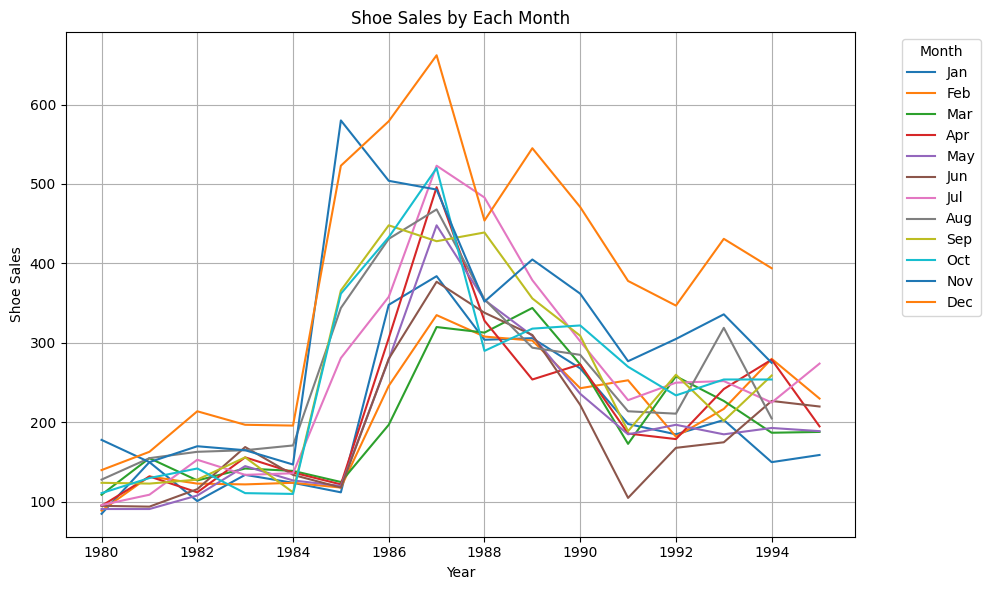

In [51]:
df1['Year'] = df1['YearMonth'].dt.year
df1['Month'] = df1['YearMonth'].dt.month

# Create a time series plot for shoe sales by each month
plt.figure(figsize=(10, 6))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for month in range(1, 13):
    monthly_data = df1[df1['Month'] == month]
    plt.plot(monthly_data['Year'], monthly_data['Shoe_Sales'], label=month_names[month - 1])# marker='o',

plt.title('Shoe Sales by Each Month')
plt.xlabel('Year')
plt.ylabel('Shoe Sales')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

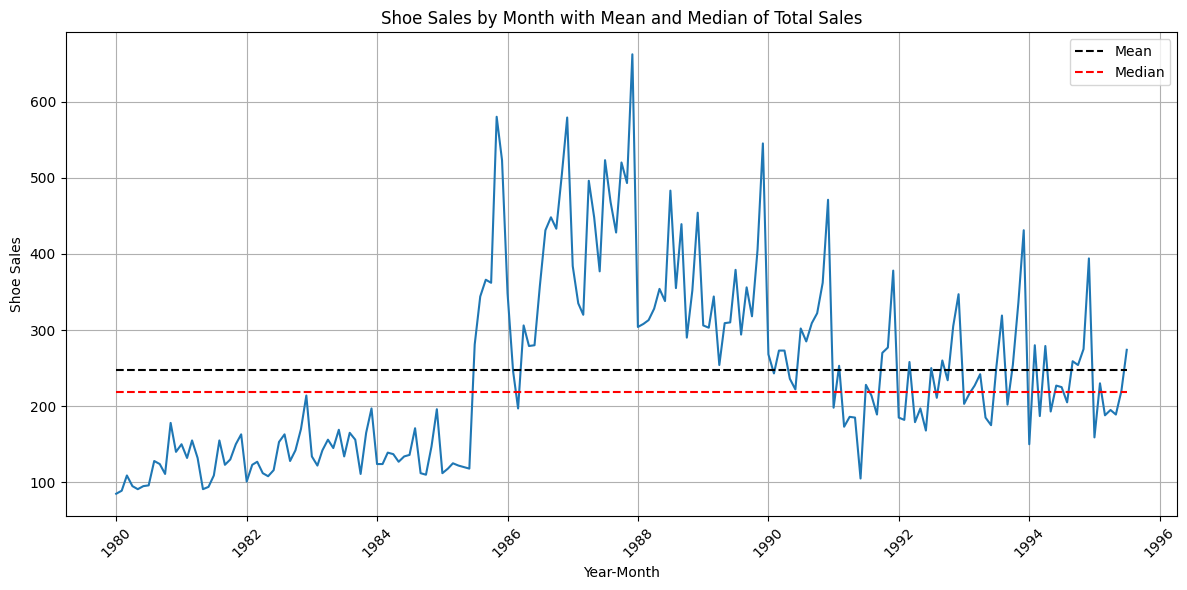

In [97]:
mean_mean_sales_by_month = df1.groupby('Month')['Shoe_Sales'].mean().mean()

# Calculate the mean and median of median shoe sales by month
mean_median_sales_by_month = df1.groupby('Month')['Shoe_Sales'].median().mean()
median_median_sales_by_month = df1.groupby('Month')['Shoe_Sales'].median().median()

# Group by 'YearMonth' and calculate the mean of all shoe sales
mean_sales_all = df1.groupby('YearMonth')['Shoe_Sales'].mean()



# Create a time series plot for shoe sales by month
plt.figure(figsize=(12, 6))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#for month in range(1, 13):
#    monthly_data = df[df['Month'] == month]
#    plt.plot(monthly_data['YearMonth'], monthly_data['Shoe_Sales'],  label=f'{month_names[month - 1]}')

plt.plot(df1['YearMonth'], df1['Shoe_Sales'])
    
# Plot the mean of mean and median of median of total sales
plt.plot(mean_sales_all.index, [mean_mean_sales_by_month] * len(mean_sales_all), linestyle='dashed', color='black', label='Mean')
plt.plot(mean_sales_all.index, [median_median_sales_by_month] * len(mean_sales_all), linestyle='dashed', color='red', label='Median')

plt.title('Shoe Sales by Month with Mean and Median of Total Sales')
plt.xlabel('Year-Month')
plt.ylabel('Shoe Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()